'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data



In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from callbackClass import LossHistory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
print cv2.__version__
print keras.__version__

2.4.11
2.1.5


In [24]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './data/train'
validation_data_dir = './data/validation'
nb_train_samples = 2626
nb_validation_samples = 281
epochs = 25
batch_size = 16
Classes = ["blot","chart","concept","telescope"]
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    


In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

# Warning ! this cell is the Training part and will change the weights trained before

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# img aug
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

history = LossHistory()

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[history])

model.save_weights('third_try.h5')

Found 2626 images belonging to 4 classes.
Found 281 images belonging to 4 classes.
Epoch 1/25
164/164 [==============================] - 30s 185ms/step - loss: 0.5070 - acc: 0.7869 - val_loss: 0.4642 - val_acc: 0.7858
Epoch 2/25
164/164 [==============================] - 30s 184ms/step - loss: 0.4316 - acc: 0.8131 - val_loss: 0.4406 - val_acc: 0.8024
Epoch 3/25
164/164 [==============================] - 30s 181ms/step - loss: 0.3930 - acc: 0.8309 - val_loss: 0.3505 - val_acc: 0.8483
Epoch 4/25
164/164 [==============================] - 29s 177ms/step - loss: 0.3485 - acc: 0.8573 - val_loss: 0.3192 - val_acc: 0.8575
Epoch 5/25
164/164 [==============================] - 28s 171ms/step - loss: 0.3459 - acc: 0.8679 - val_loss: 0.3320 - val_acc: 0.8548
Epoch 6/25
164/164 [==============================] - 29s 175ms/step - loss: 0.3017 - acc: 0.8804 - val_loss: 0.2958 - val_acc: 0.8594
Epoch 7/25
164/164 [==============================] - 29s 179ms/step - loss: 0.2893 - acc: 0.8791 - val_los

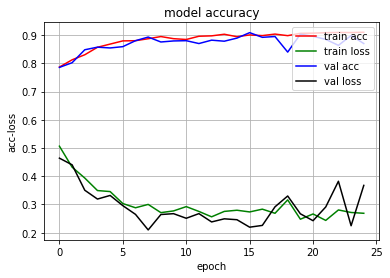

In [29]:
history.params
history.loss_plot('epoch')

# Test Part

[[0. 0. 0. 1.]]
telescope


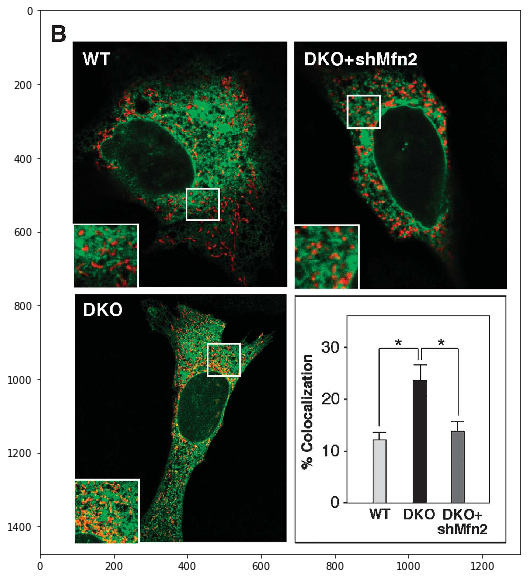

[[1. 0. 0. 0.]]
blot


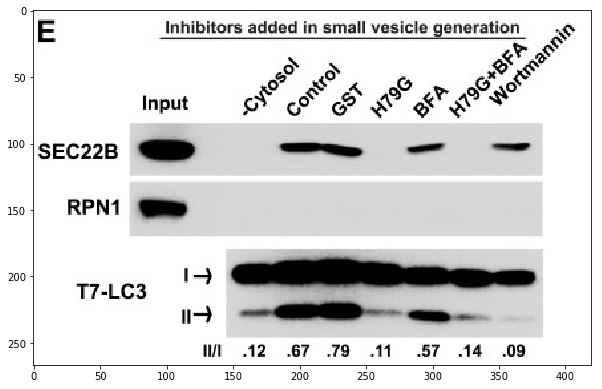

[[0.1947 0.4024 0.3923 0.0106]]
chart


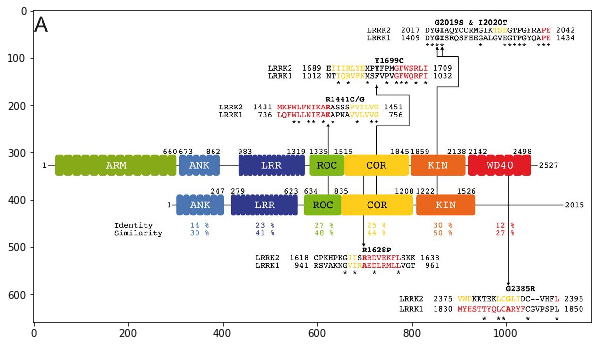

[[0.0881 0.5719 0.3393 0.0007]]
chart


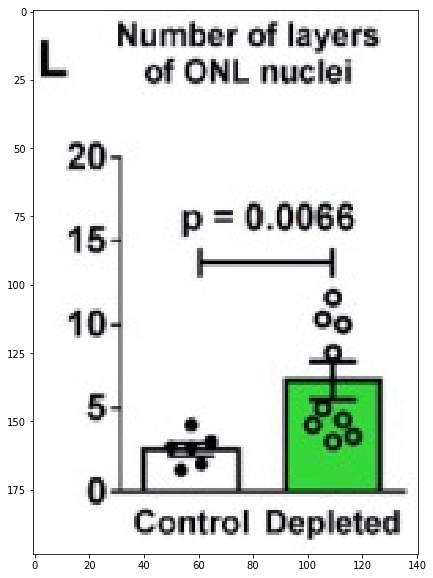

In [30]:
model.load_weights("second_try.h5")

dummy_array = np.zeros(4)

imageTel = cv2.imread('./data/validation/telescope/61_2.jpg')
imageBlot = cv2.imread('./data/validation/blot/506_5.jpg')
imageConcept = cv2.imread('./data/validation/concept/95_1.jpg')
imageChart = cv2.imread('./data/validation/chart/572_12.jpg')
imageList = [imageTel,imageBlot,imageConcept,imageChart]

for image in imageList:
    if type(image)==np.ndarray:#image!=None:

        plt.figure(figsize=(10,10))

        input_image = cv2.resize(image, (img_width, img_height))
        input_image = input_image / 255.
        input_image = input_image[:,:,::-1]
        input_image = np.expand_dims(input_image, 0)

        netout = model.predict(input_image)

        print(np.around(netout,4))
        print(Classes[np.argmax(netout)])

        plt.imshow(image[:,:,::-1]);
        plt.show()
